In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load datasets
student_mat = pd.read_csv('student-mat.csv', sep=';')
student_por = pd.read_csv('student-por.csv', sep=';')


In [7]:
# Merge datasets on specified columns
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus",
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

merged_data = pd.merge(student_mat, student_por, on=merge_columns, suffixes=('_mat', '_por'))


In [8]:
merged_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
merged_data.isnull().sum()

school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian_mat      0
traveltime_mat    0
studytime_mat     0
failures_mat      0
schoolsup_mat     0
famsup_mat        0
paid_mat          0
activities_mat    0
nursery           0
higher_mat        0
internet          0
romantic_mat      0
famrel_mat        0
freetime_mat      0
goout_mat         0
Dalc_mat          0
Walc_mat          0
health_mat        0
absences_mat      0
G1_mat            0
G2_mat            0
G3_mat            0
guardian_por      0
traveltime_por    0
studytime_por     0
failures_por      0
schoolsup_por     0
famsup_por        0
paid_por          0
activities_por    0
higher_por        0
romantic_por      0
famrel_por        0
freetime_por      0
goout_por         0
Dalc_por          0
Walc_por          0
health_por        0
absences_por      0


In [10]:
print(merged_data.describe())

              age        Medu        Fedu  traveltime_mat  studytime_mat  \
count  382.000000  382.000000  382.000000      382.000000     382.000000   
mean    16.586387    2.806283    2.565445        1.442408       2.034031   
std      1.173470    1.086381    1.096240        0.695378       0.845798   
min     15.000000    0.000000    0.000000        1.000000       1.000000   
25%     16.000000    2.000000    2.000000        1.000000       1.000000   
50%     17.000000    3.000000    3.000000        1.000000       2.000000   
75%     17.000000    4.000000    4.000000        2.000000       2.000000   
max     22.000000    4.000000    4.000000        4.000000       4.000000   

       failures_mat  famrel_mat  freetime_mat   goout_mat    Dalc_mat  ...  \
count    382.000000  382.000000    382.000000  382.000000  382.000000  ...   
mean       0.290576    3.939791      3.222513    3.112565    1.473822  ...   
std        0.729481    0.921620      0.988233    1.131927    0.886229  ...   
min

#EDA Analysis

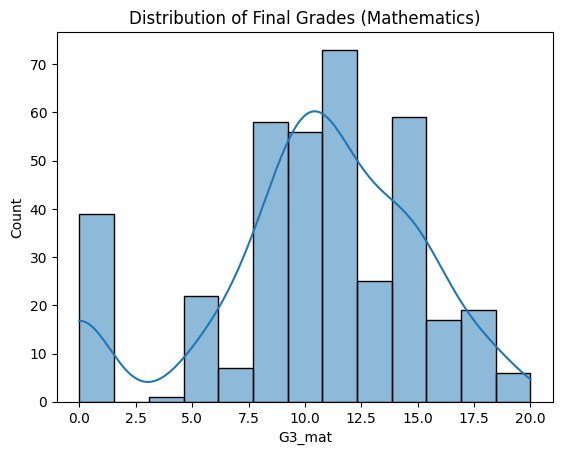

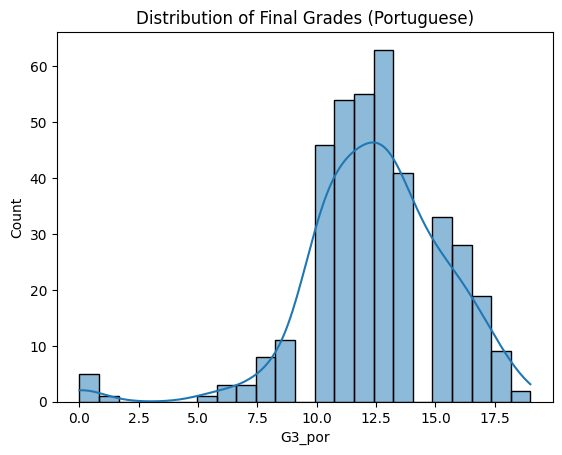

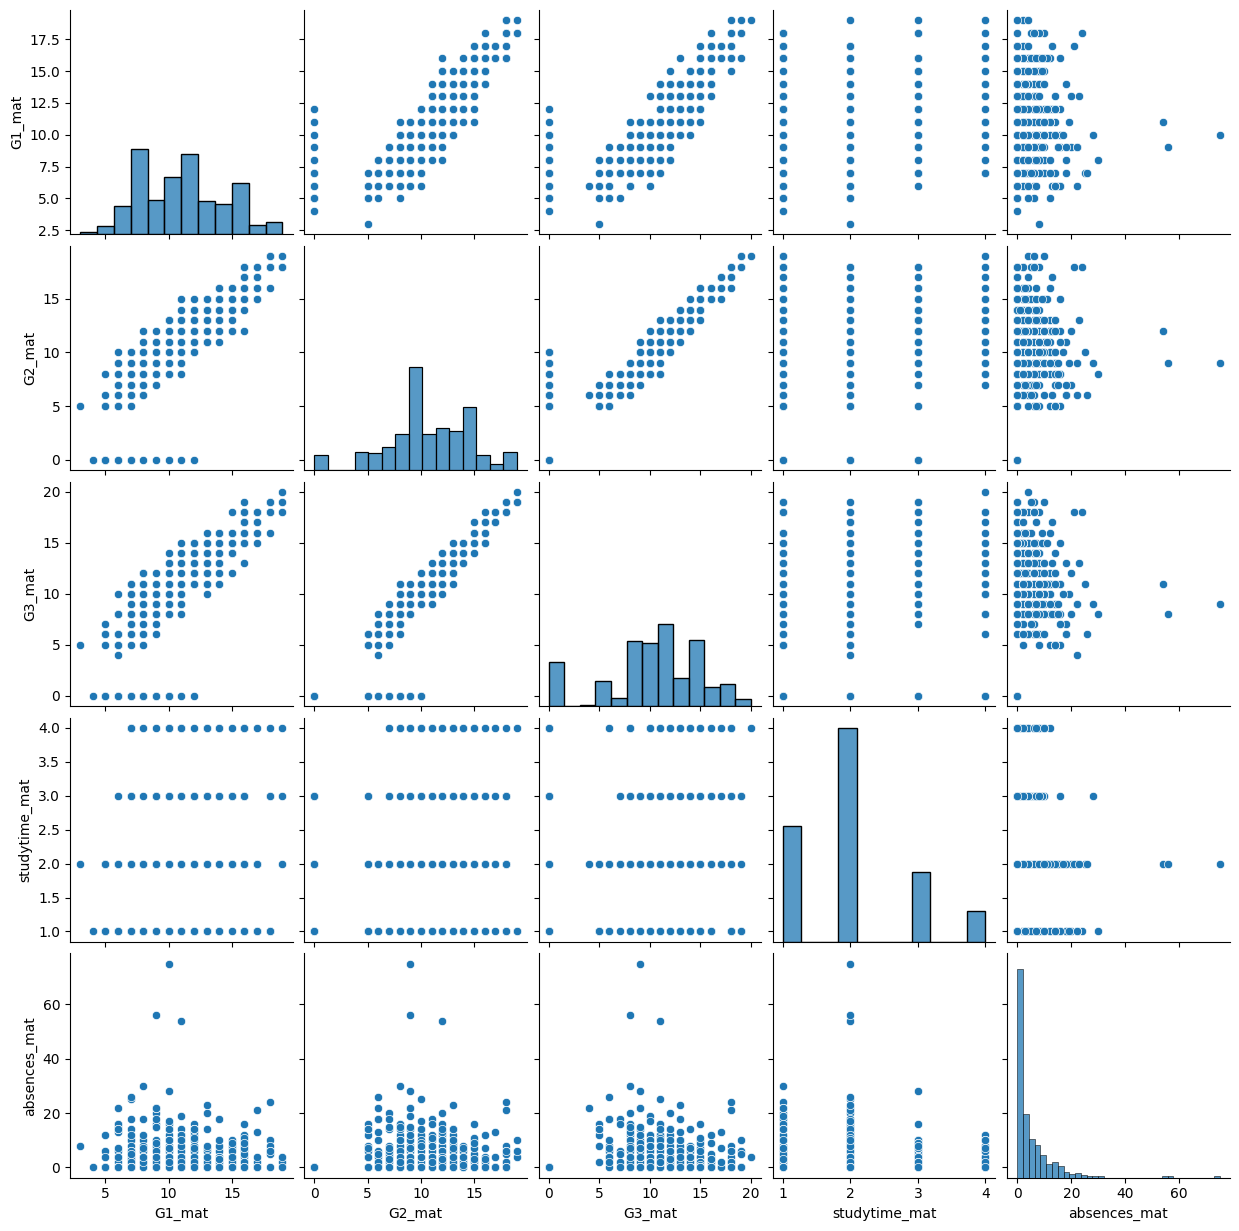

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
#corr_matrix = merged_data.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()

# Distribution of final grades
sns.histplot(merged_data['G3_mat'], kde=True)
plt.title('Distribution of Final Grades (Mathematics)')
plt.show()

sns.histplot(merged_data['G3_por'], kde=True)
plt.title('Distribution of Final Grades (Portuguese)')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(merged_data[['G1_mat', 'G2_mat', 'G3_mat', 'studytime_mat', 'absences_mat']])
plt.show()


##Applying LINEAR REGRESSION MODEL

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_features = ['famsize', 'internet']

le = LabelEncoder()
for feature in categorical_features:
    merged_data[feature] = le.fit_transform(merged_data[feature])

# Select features and target
features = ['studytime_mat', 'G1_mat', 'G2_mat', 'absences_mat', 'age', 'famsize', 'Medu', 'Fedu', 'internet']
target_mat = merged_data['G3_mat']
target_por = merged_data['G3_por']

X = merged_data[features]

# Train-test split for Mathematics
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X, target_mat, test_size=0.2, random_state=42)

# Train-test split for Portuguese
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X, target_por, test_size=0.2, random_state=42)


##Train and Evaluate Model

In [13]:
# Linear Regression Model for Mathematics
model_mat = LinearRegression()
model_mat.fit(X_train_mat, y_train_mat)
predictions_mat = model_mat.predict(X_test_mat)

mse_mat = mean_squared_error(y_test_mat, predictions_mat)
r2_mat = r2_score(y_test_mat, predictions_mat)

print(f'Mathematics - Mean Squared Error: {mse_mat}')
print(f'Mathematics - R² Score: {r2_mat}')

# Linear Regression Model for Portuguese
model_por = LinearRegression()
model_por.fit(X_train_por, y_train_por)
predictions_por = model_por.predict(X_test_por)

mse_por = mean_squared_error(y_test_por, predictions_por)
r2_por = r2_score(y_test_por, predictions_por)

print(f'Portuguese - Mean Squared Error: {mse_por}')
print(f'Portuguese - R² Score: {r2_por}')


Mathematics - Mean Squared Error: 4.451538388987859
Mathematics - R² Score: 0.8005443290939874
Portuguese - Mean Squared Error: 6.003579008584431
Portuguese - R² Score: 0.362526954011657


## Visualizing the Model Performance

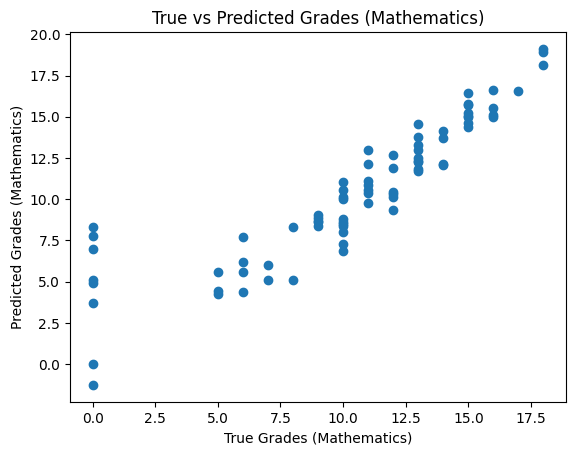

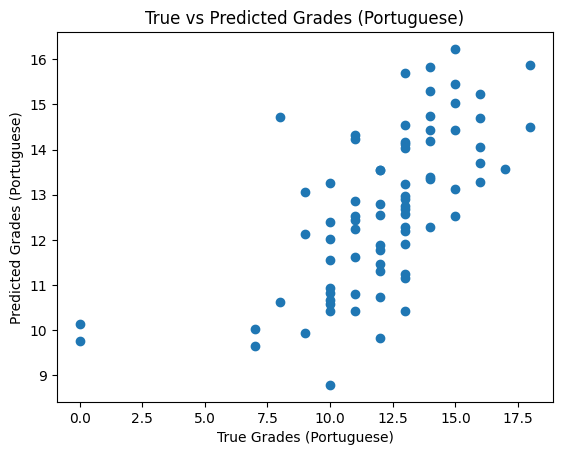

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test_mat, predictions_mat)
plt.xlabel('True Grades (Mathematics)')
plt.ylabel('Predicted Grades (Mathematics)')
plt.title('True vs Predicted Grades (Mathematics)')
plt.show()

plt.scatter(y_test_por, predictions_por)
plt.xlabel('True Grades (Portuguese)')
plt.ylabel('Predicted Grades (Portuguese)')
plt.title('True vs Predicted Grades (Portuguese)')
plt.show()
